In [42]:
# Dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

# Set up Splinter (executable path)
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit mars weather
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Parse through HTML Data
html = browser.html
html_soup = soup(html,'html.parser')

In [51]:
weather_data = []

table = html_soup.find('tbody')

In [52]:
table_headers = table.find_all('th')
header_list = []
for header in table_headers:
    header_list.append(header.text)

weather_data.append(header_list)
weather_data

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']]

In [53]:
table_rows = table.find_all('tr', class_='data-row')
for row in table_rows:
    data = []
    table_data = row.find_all('td')
    for x in table_data:
        data.append(x.text)
    weather_data.append(data)

weather_data
     

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [73]:
weather_df = pd.DataFrame(weather_data)
weather_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
weather_df_clean = weather_df.iloc[1:]
weather_df_clean

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [70]:
weather_df_clean.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [82]:
weather_df_clean[['id', 'sol', 'ls', 'month']] = weather_df_clean[['id', 'sol', 'ls', 'month']].astype(int)
weather_df_clean[['min_temp', 'pressure']] = weather_df_clean[['min_temp', 'pressure']].astype(float)
weather_df_clean['terrestrial_date'] = pd.to_datetime(weather_df_clean['terrestrial_date'])
weather_df_clean.dtypes

/var/folders/pl/bk_7f3f55gv8h0t2jd9j0_s80000gr/T/ipykernel_10763/1200176307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_clean[['id', 'sol', 'ls', 'month']] = weather_df_clean[['id', 'sol', 'ls', 'month']].astype(int)
/var/folders/pl/bk_7f3f55gv8h0t2jd9j0_s80000gr/T/ipykernel_10763/1200176307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df_clean[['min_temp', 'pressure']] = weather_df_clean[['min_temp', 'pressure']].astype(float)
/var/folders/pl/bk_7f3f55gv8h0t2jd9j0_s80000gr

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [83]:
weather_df_clean

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [84]:
weather_df_clean.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [85]:
#how many months exist on mars? Max of [month] is 12
#how many martian days worth of data? [Sol] Max - Min = 1967

In [106]:
#what are coldest and warmest months on mars
monthly_data_df = weather_df_clean.groupby('month').mean()
monthly_temp_df = monthly_data_df.loc[:,['min_temp']]
monthly_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<AxesSubplot:xlabel='month'>

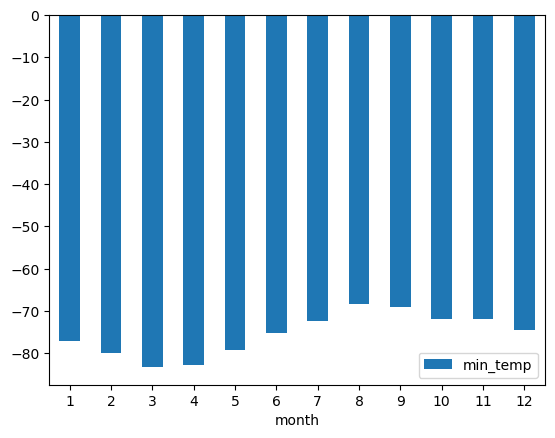

In [111]:
monthly_temp_df.plot.bar(rot=0)
#The coldest month is 3, the warmest month is 8

In [108]:
monthly_pressure_df = monthly_data_df.loc[:,['pressure']]
monthly_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<AxesSubplot:xlabel='month'>

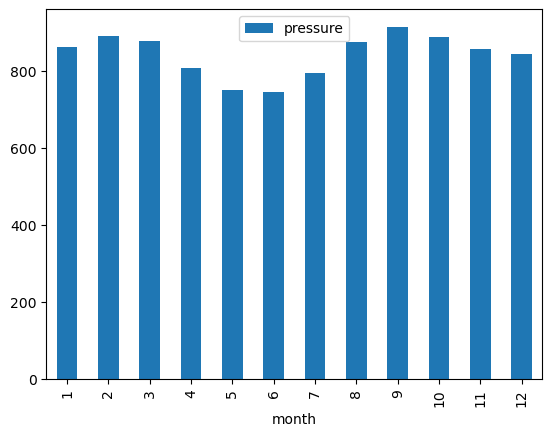

In [109]:
monthly_pressure_df.plot.bar()
# The month with the lowest pressure is 6, 
#the month with the highest pressure is 9

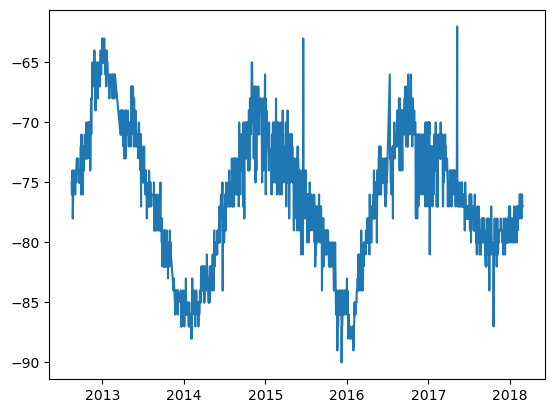

In [116]:
#estimate the number of earth days based on minimum daily temperature
x_values = weather_df_clean['terrestrial_date']
y_values = weather_df_clean['min_temp']
plt.plot(x_values,y_values)
plt.show()
#there are approximately 700 earth days in a martian year 